In [ ]:
## To better understand data for Computing Vision project. Looking to turn data interpretations into insights.
# Analysis and cleansing largely conducted via Pandas library.

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
budgets = pd.read_csv('tn.movie_budgets.csv')
budgets.head()

# the movie budgets csv file includes data around release date, movie, production budget, domestic gross, and 
#     worldthis file also includes an ID field.

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
# to change release date into a date type
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [13]:
# to change dollar variables into integer types
budgets[budgets.columns[3:]] = budgets[budgets.columns[3:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)

In [14]:
# integer conversion successful
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [15]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [24]:
budgets['production_budget'].describe()

count        5782.00
mean     31587757.10
std      41812076.83
min          1100.00
25%       5000000.00
50%      17000000.00
75%      40000000.00
max     425000000.00
Name: production_budget, dtype: float64

In [64]:
budgets['domestic_gross'].describe()

count        5782.00
mean     41873326.87
std      68240597.36
min             0.00
25%       1429534.50
50%      17225945.00
75%      52348661.50
max     936662225.00
Name: domestic_gross, dtype: float64

In [63]:
budgets['worldwide_gross'].describe()

count         5782.00
mean      91487460.91
std      174719968.78
min              0.00
25%        4125414.75
50%       27984448.50
75%       97645836.50
max     2776345279.00
Name: worldwide_gross, dtype: float64

<AxesSubplot:xlabel='production_budget', ylabel='domestic_gross'>

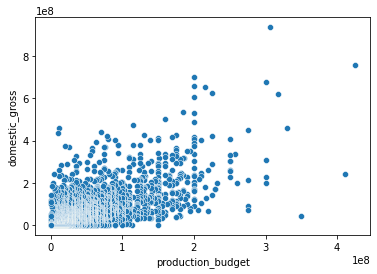

In [66]:
import seaborn as sns
sns.scatterplot(x = 'production_budget', y ='domestic_gross', data = budgets)

(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08,
        3.5e+08, 4.0e+08, 4.5e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

C:\Users\irousseau\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\irousseau\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\irousseau\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\irousseau\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


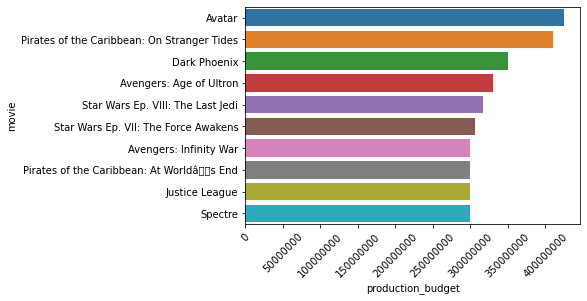

In [78]:
# top 10 movie production budget
sns.barplot(
    x='production_budget',
    y='movie',
    data=budgets.nlargest(10, 'production_budget')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

(array([0.e+00, 2.e+08, 4.e+08, 6.e+08, 8.e+08, 1.e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

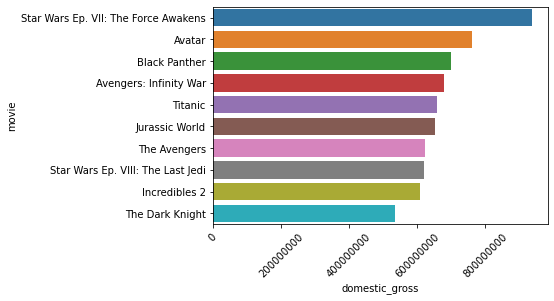

In [80]:
# top 10 movie domestic gross income
sns.barplot(
    x='domestic_gross',
    y='movie',
    data=budgets.nlargest(10, 'domestic_gross')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)


# about half of these movies were not in the top 10 production budget
#     (Titanic, Jurassic World, The Avengers, Incredibles 2, Black Panther)
# Star Wars: The Force Awakens jumps to top domestic gross income earner, despite being number 6 in the production budget

(array([0.0e+00, 5.0e+08, 1.0e+09, 1.5e+09, 2.0e+09, 2.5e+09, 3.0e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

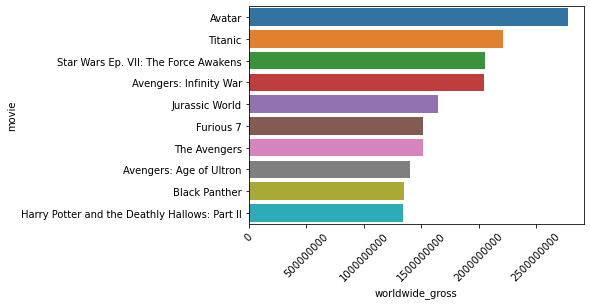

In [81]:
# top 10 movie worldwide gross income
sns.barplot(
    x='worldwide_gross',
    y='movie',
    data=budgets.nlargest(10, 'worldwide_gross')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

# Avatar and Titanis preform better with international audiences; most of the movies are simialr to domestic gross
#     Haryy Potter and Furious 7 join in the group

In [ ]:
# Domestic gross seems to be the largest earning area for movies - analysis on addressing the key question to closely 
#     consider the tastes/preferneces of domestic movie watchers over international, especially since many of the same
#     movie favorites in the United States are also movie favorites abroad.

# Determine what makes these movies popular OTHER than production budget. Movies do not have to spend a lot of money
#     to make a lot of money in the domestic box office; seek to understand movie characteristics.

In [84]:
information = pd.read_table('rt.movie_info.tsv', delimiter='\t')
information.head()

# information includes more detail about the genre, director, write, runtime, and synopsis of films
# id field does not match the budgets id field and this data contains less data

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [85]:
information.info()

# currency, box office, studio seem to have more null values than completed values; likely to drop
# synopsis, rating, genre, and runtime seem to be the most complete values
# no movie names makes it hard to understand relationship to budgets data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [86]:
movies = pd.read_csv('tmdb.movies.csv')
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [87]:
movies.info()

# complete data
# id look like itdoes not match the previous data frames, but it does include a movie title, making 
#     it easy to draw conclusions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [89]:
movies['popularity'].describe()
# the max and min are immediately flagged as outliers to me

count   26517.00
mean        3.13
std         4.36
min         0.60
25%         0.60
50%         1.37
75%         3.69
max        80.77
Name: popularity, dtype: float64

In [91]:
movies['vote_average'].describe()

count   26517.00
mean        5.99
std         1.85
min         0.00
25%         5.00
50%         6.00
75%         7.00
max        10.00
Name: vote_average, dtype: float64

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

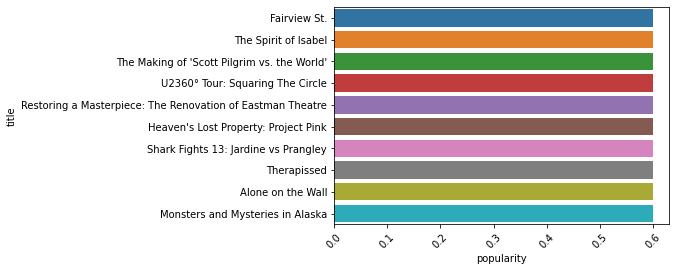

In [94]:
# bottom 10 movie popularity scores
sns.barplot(
    x='popularity',
    y='title',
    data=movies.nsmallest(10, 'popularity')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

# 0.6 might be used as a null placeholder

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

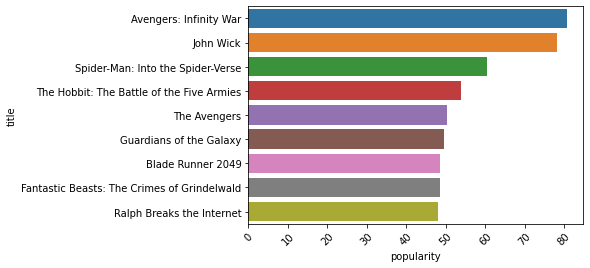

In [95]:
# top 10 movie popularity scores
sns.barplot(
    x='popularity',
    y='title',
    data=movies.nlargest(10, 'popularity')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

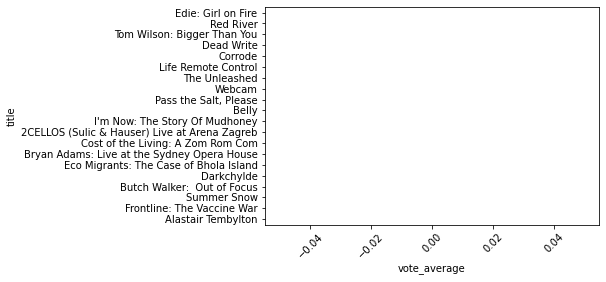

In [98]:
# bottom 20 movie vote average scores
sns.barplot(
    x='vote_average',
    y='title',
    data=movies.nsmallest(20, 'vote_average')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

# inconsistent data?

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

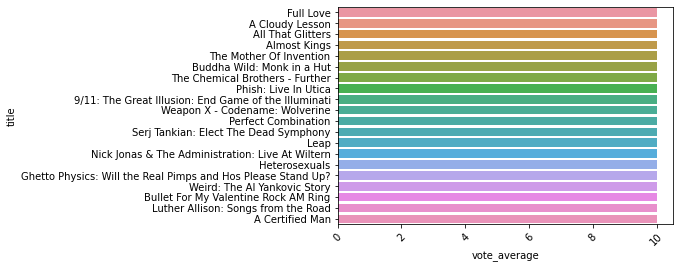

In [100]:
# top 20 movie vote average scores
sns.barplot(
    x='vote_average',
    y='title',
    data=movies.nlargest(20, 'vote_average')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

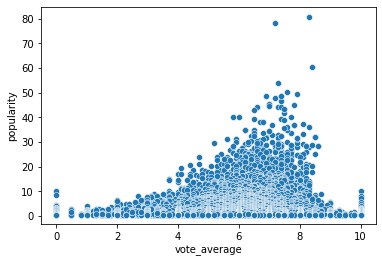

In [103]:
# scatter between vote average and popularity score
sns.scatterplot(
    x='vote_average',
    y='popularity',
    data=movies
)

# weird distribution because of popularity scores

<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

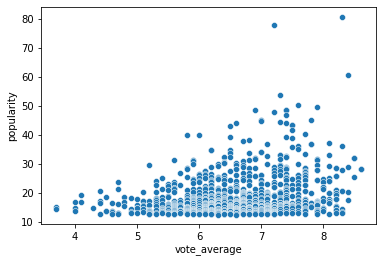

In [108]:
# scatter between vote average and popularity score
sns.scatterplot(
    x='vote_average',
    y='popularity',
    data=movies.nlargest(1000, 'popularity')
)


<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

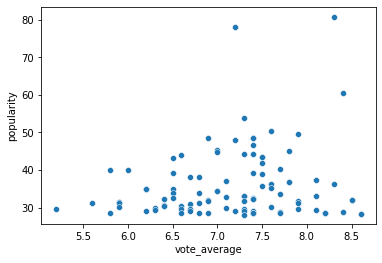

In [109]:
# scatter between vote average and popularity score
sns.scatterplot(
    x='vote_average',
    y='popularity',
    data=movies.nlargest(100, 'popularity')
)


<AxesSubplot:xlabel='vote_average', ylabel='vote_count'>

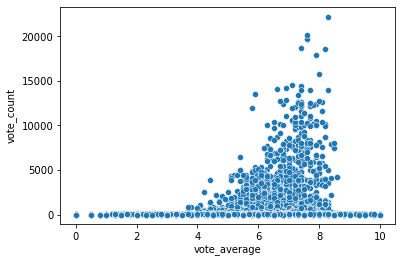

In [111]:
# scatter between vote_average and vote_count
sns.scatterplot(
    x='vote_average',
    y='vote_count',
    data=movies
)


In [29]:
import sqlite3

# create a connection
conn = sqlite3.connect('im.db')
cur = conn.cursor()

In [30]:
pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,None


In [6]:
pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


In [4]:
pd.read_sql("""
SELECT *
  FROM movie_basics mb
  INNER JOIN movie_ratings mr ON mb.movie_id=mr.movie_id;
""", conn)

# upon inner join about 1/2 of the data from movie_basics was lost

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",tt0063540,7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",tt0066787,7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,tt0069049,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",tt0069204,6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",tt0100275,6.50,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00,Documentary,tt9913084,6.20,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00,"Drama,Family",tt9914286,8.70,136
73853,tt9914642,Albatross,Albatross,2017,nan,Documentary,tt9914642,8.50,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,nan,None,tt9914942,6.60,5


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

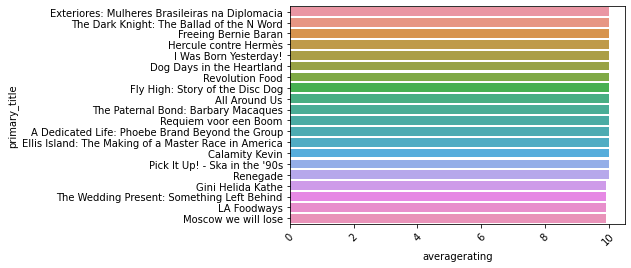

In [7]:
rating = pd.read_sql("""
SELECT *
  FROM movie_basics mb
  INNER JOIN movie_ratings mr ON mb.movie_id=mr.movie_id;
""", conn)

sns.barplot(
    x='averagerating',
    y='primary_title',
    data=rating.nlargest(20, 'averagerating')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

# many movies have an average rating of 10
# note: I have not heard about any of these movies before

In [13]:
rtreviews = pd.read_table('rt.reviews.tsv', sep='\t', engine='python')
rtreviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4]:
bom = pd.read_csv('bom.movie_gross.csv.gz')
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [15]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [25]:
budgets.info()

# budgets and bom seem to have similar variables; maybe combining them could derive good insights.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [23]:
# To merge bom and budgets data

bom_budgets = pd.merge(budgets, bom, how='inner',
                  left_on='movie', right_on='title')
bom_budgets.head(50)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.00,804600000,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.00,946400000,2015
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.00,"1,369.5",2018
3,9,2017-11-17,Justice League,300000000,229024295,655945209,Justice League,WB,229000000.00,428900000,2017
4,10,2015-11-06,Spectre,300000000,200074175,879620923,Spectre,Sony,200100000.00,680600000,2015
5,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,WB,448100000.00,636800000,2012
6,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347,Solo: A Star Wars Story,BV,213800000.00,179200000,2018
7,13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,The Lone Ranger,BV,89300000.00,171200000,2013
8,14,2012-03-09,John Carter,275000000,73058679,282778100,John Carter,BV,73100000.00,211100000,2012
9,15,2010-11-24,Tangled,260000000,200821936,586477240,Tangled,BV,200800000.00,391000000,2010


In [17]:
bom_budgets.info()

# incomplete information on foreign_gross
# some inconsistencies between domestic_gross, but potentially not material

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1247 non-null   int64         
 1   release_date       1247 non-null   datetime64[ns]
 2   movie              1247 non-null   object        
 3   production_budget  1247 non-null   int64         
 4   domestic_gross_x   1247 non-null   int64         
 5   worldwide_gross    1247 non-null   int64         
 6   title              1247 non-null   object        
 7   studio             1246 non-null   object        
 8   domestic_gross_y   1245 non-null   float64       
 9   foreign_gross      1086 non-null   object        
 10  year               1247 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 116.9+ KB


In [81]:
top_studio = bom_budgets['domestic_gross_x'].groupby(by=bom_budgets['studio']).sum()
top_studio.nlargest(10)

# the highest earning domestic grossing movies: top 4 are pretty far ahead of the others
# BV (Disney), Universal, Fox, Warner Brothers

studio
BV         12926142171
Uni.       10706840840
Fox         9410233951
WB          9130527872
Sony        7059959451
Par.        6007203309
WB (NL)     3417630150
LGF         3332464750
P/DW        1682914686
LG/S        1499805058
Name: domestic_gross_x, dtype: int64

In [88]:
# average studio domestic gross 

avg_domgross = bom_budgets['domestic_gross_x'].groupby(by=bom_budgets['studio']).mean()
avg_domgross.nlargest(10)

# Disney makes the most revenue on average

studio
BV        179529752.38
P/DW      168291468.60
Sony       95404857.45
WB (NL)    92368382.43
Uni.       91511460.17
WB         89514979.14
Fox        85547581.37
MGM        82992874.00
Par.       81178423.09
Strand     75395035.00
Name: domestic_gross_x, dtype: float64

(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08,
        3.5e+08, 4.0e+08, 4.5e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

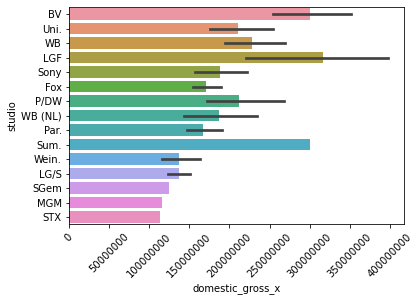

In [18]:
# the top 200 domestic grossing movies came from these studios
sns.barplot(
    x='domestic_gross_x',
    y='studio',
    data=bom_budgets.nlargest(200, 'domestic_gross_x')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

# There are only 4 ovie studios represented in this merged data
# BV is Buena Vista; aka Disney
# Uni. is Universal Studios
# WB is Warner Brothers Studios

(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

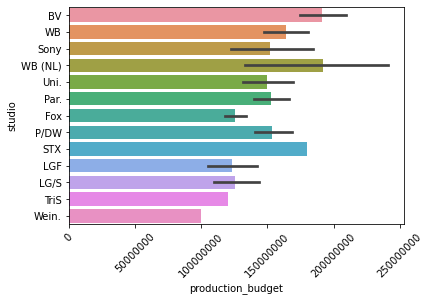

In [82]:
# the top 200 spending movies came from these studios
sns.barplot(
    x='production_budget',
    y='studio',
    data=bom_budgets.nlargest(200, 'production_budget')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

In [83]:
top_studio_spend = bom_budgets['production_budget'].groupby(by=bom_budgets['studio']).sum()
top_studio_spend.nlargest(10)

# the highest spending movie studios are similar to those that earned the most money is domestic gross income;
#     this top 10 is also the same

studio
BV         9450800000
WB         8197700000
Fox        7755500000
Uni.       6597700000
Sony       5050500000
Par.       4770000000
WB (NL)    2148600000
LGF        2069387650
LG/S       1658350000
P/DW       1334000000
Name: production_budget, dtype: int64

In [85]:
# average studio spend on production 

avg_prod_budget = bom_budgets['production_budget'].groupby(by=bom_budgets['studio']).mean()
avg_prod_budget.nlargest(10)

# DreamWorks is the biggest average spender; barely over Walt Disney

studio
P/DW      133400000.00
BV        131261111.11
WB         80369607.84
Fox        70504545.45
NM         70000000.00
Sony       68250000.00
Par.       64459459.46
WB (NL)    58070270.27
Uni.       56390598.29
LG/S       53495161.29
Name: production_budget, dtype: float64

In [ ]:
# Hunch: use a statistical test to determine how much to spend on a movie to get some outcome in domestic gross

(array([0.e+00, 1.e+08, 2.e+08, 3.e+08, 4.e+08, 5.e+08, 6.e+08, 7.e+08,
        8.e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

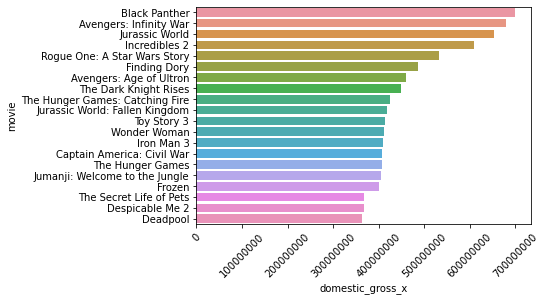

In [20]:
# top 20 domestic grossing movies
sns.barplot(
    x='domestic_gross_x',
    y='movie',
    data=bom_budgets.nlargest(20, 'domestic_gross_x')
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

In [21]:
bom_budgets.nlargest(20, 'domestic_gross_x')

# the top movies were mostly from the top studios
# all of these top movies are either superheroes, based on books, remakes of a classic, part of a series
# very little "original" content, more so just based upon things that are already popular/known by public

# inner join filtered out Star Wars and Avatar, which is actually the top domestic grossing movie* 
#     because of no match in bom data

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
25,42,2018-02-16,Black Panther,200000000,700059566,1348258224,Black Panther,BV,700100000.00,646900000,2018
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.00,"1,369.5",2018
21,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,Jurassic World,Uni.,652300000.00,"1,019.4",2015
26,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,Incredibles 2,BV,608600000.00,634200000,2018
27,45,2016-12-16,Rogue One: A Star Wars Story,200000000,532177324,1049102856,Rogue One: A Star Wars Story,BV,532200000.00,523900000,2016
28,46,2016-06-17,Finding Dory,200000000,486295561,1021215193,Finding Dory,BV,486300000.00,542300000,2016
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.00,946400000,2015
5,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,WB,448100000.00,636800000,2012
126,38,2013-11-22,The Hunger Games: Catching Fire,130000000,424668047,864868047,The Hunger Games: Catching Fire,LGF,424700000.00,440300000,2013
65,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000,2018


In [24]:
# comparing to just budgets data
budgets.nlargest(20, 'domestic_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
42,43,1997-12-19,Titanic,200000000,659363944,2208208395
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
43,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711
74,75,2008-07-18,The Dark Knight,185000000,533720947,1001996207


In [27]:
# To merge bom and budgets data

bom_budgets1 = pd.merge(budgets, bom, how='left',
                  left_on='movie', right_on='title')
bom_budgets1.head(50)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,NaN,NaN,nan,NaN,nan
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.00,804600000,2011.00
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,NaN,NaN,nan,NaN,nan
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.00,946400000,2015.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,nan,NaN,nan
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,NaN,NaN,nan,NaN,nan
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.00,"1,369.5",2018.00
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,NaN,NaN,nan,NaN,nan
8,9,2017-11-17,Justice League,300000000,229024295,655945209,Justice League,WB,229000000.00,428900000,2017.00
9,10,2015-11-06,Spectre,300000000,200074175,879620923,Spectre,Sony,200100000.00,680600000,2015.00


In [28]:
bom_budgets1.nlargest(20, 'domestic_gross_x')
c
# upon left joining we see that many top movies got filtered out in the inner join
# however, the theory still stands that top movies include very little "original" content (except for Avatar and ET)
# movies for children also seem to be popular, which might be an opportunity

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,NaN,NaN,nan,NaN,nan
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,NaN,NaN,nan,NaN,nan
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,Black Panther,BV,700100000.00,646900000,2018.00
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.00,"1,369.5",2018.00
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,NaN,NaN,nan,NaN,nan
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,Jurassic World,Uni.,652300000.00,"1,019.4",2015.00
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,NaN,NaN,nan,NaN,nan
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,nan,NaN,nan
43,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,Incredibles 2,BV,608600000.00,634200000,2018.00
74,75,2008-07-18,The Dark Knight,185000000,533720947,1001996207,NaN,NaN,nan,NaN,nan


In [ ]:
# one recommendation could be that Computing Vision reimagine movie classics or create movies based on book favorites 
# superheroes also seem to be popular - they could form creative content around superheroes
# Computing Vision could also make movies children might like, based off of their favorite stories or characters

In [34]:
pd.read_sql("""
SELECT *
  FROM movie_akas;
""", conn)

# pretty much worthless

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.00
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.00
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.00
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.00
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.00
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.00
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.00
331700,tt9880178,1,La atención,None,None,original,None,1.00
331701,tt9880178,2,La atención,ES,None,None,None,0.00


In [36]:
pd.read_sql("""
SELECT *
  FROM movie_basics mb
  INNER JOIN movie_ratings mr ON mb.movie_id=mr.movie_id;
""", conn)

# appears that db file is comprised of international films... not seeeing anything familiar

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",tt0063540,7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",tt0066787,7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,tt0069049,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",tt0069204,6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",tt0100275,6.50,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00,Documentary,tt9913084,6.20,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00,"Drama,Family",tt9914286,8.70,136
73853,tt9914642,Albatross,Albatross,2017,nan,Documentary,tt9914642,8.50,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,nan,None,tt9914942,6.60,5


In [44]:
pd.read_sql("""
SELECT primary_title, genres, averagerating
  FROM movie_basics mb
  INNER JOIN movie_ratings mr ON mb.movie_id=mr.movie_id
  GROUP BY mb.movie_id
  HAVING numvotes > 1000
  ORDER BY averagerating DESC
  LIMIT 20;
""", conn)

# drama appears a lot in this query result

,primary_title,genres,averagerating
0,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.70
1,Ekvtime: Man of God,"Biography,Drama,History",9.60
2,I Want to Live,"Adventure,Biography,Documentary",9.60
3,Aloko Udapadi,"Drama,History",9.50
4,Peranbu,Drama,9.40
5,The Mountain II,"Action,Drama,War",9.30
6,Truth and Justice,Drama,9.30
7,Aynabaji,"Crime,Mystery,Thriller",9.30
8,Wheels,Drama,9.30
9,C/o Kancharapalem,Drama,9.20


In [48]:
# assessing runtime and finding the top 200 rated movies' runtimes
runtime = pd.read_sql("""
SELECT primary_title, runtime_minutes, averagerating
  FROM movie_basics mb
  INNER JOIN movie_ratings mr ON mb.movie_id=mr.movie_id
  GROUP BY mb.movie_id
  HAVING numvotes > 1000
  ORDER BY averagerating DESC
  LIMIT 200;
""", conn)

runtime.head()

,primary_title,runtime_minutes,averagerating
0,Once Upon a Time ... in Hollywood,159.00,9.70
1,Ekvtime: Man of God,132.00,9.60
2,I Want to Live,106.00,9.60
3,Aloko Udapadi,113.00,9.50
4,Peranbu,147.00,9.40


In [49]:
runtime.mean()

# popular movies are about 2 hours long

runtime_minutes   129.86
averagerating       8.58
dtype: float64

Text(0, 0.5, 'Average Rating')

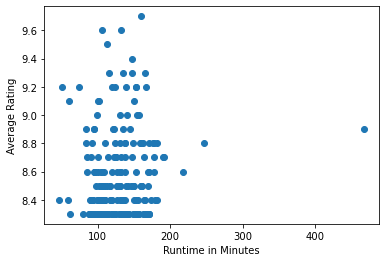

In [59]:
plt.scatter(runtime['runtime_minutes'], runtime['averagerating'])
plt.xlabel('Runtime in Minutes')
plt.ylabel('Average Rating')

# the top 200 rated movies are concentrated between runtimes od 100 and 200 with very few outside of the maximum bound